In [1]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from Interpreter import Interpreter 

In [2]:
model_path = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_path, output_attentions=True)
tokenizer = GPT2Tokenizer.from_pretrained(model_path)

input_embedding_weight_std = model.get_input_embeddings().weight.view(1,-1).std().item()
model.eval()

text = "How many more times will you remember a certain afternoon of your childhood, some afternoon that's so deeply a part"
inputs = tokenizer.encode_plus(text, return_tensors='pt', add_special_tokens=True, add_space_before_punct_symbol=True)
input_ids = inputs['input_ids']

words = [tokenizer.decoder.get(x).strip('Ġ') for x in input_ids.tolist()[0]]

with torch.no_grad():
    x = model.get_input_embeddings()(input_ids).squeeze()

def Phi(x):
    global model
    result = model(inputs_embeds=x)[0]
    return result[-1,:] # return the logit of last word

interpreter = Interpreter(x=x, Phi=Phi, 
                          scale=10*input_embedding_weight_std,
                          words=words).to(model.device)

In [3]:
interpreter.optimize(iteration=1000, lr=0.01, show_progress=True)

100%|██████████| 1000/1000 [36:47<00:00,  2.21s/it]   


In [4]:
interpreter.get_sigma()

array([0.541841  , 1.2821257 , 1.1601733 , 1.3226551 , 1.2867883 ,
       1.3029702 , 1.3542947 , 1.2331558 , 1.2909375 , 1.0450093 ,
       1.0812416 , 1.3084031 , 1.0633148 , 1.1958865 , 1.3965175 ,
       1.2421476 , 1.0326487 , 0.45266917, 0.3744312 , 0.48842564,
       1.3544699 , 0.40084958], dtype=float32)

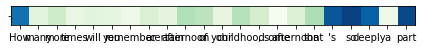

In [5]:
interpreter.visualize()